In [9]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math
import collections

In [10]:
def read_file(folder, step_number, filename_list):
    data = collections.defaultdict(list)
    path_to_file = folder + '/' + folder + '.iter' + step_number + '/'
    for filename in filename_list:
        full_name = path_to_file + filename
        file = open(full_name, 'r')
        file = file.readlines()
        for line in file: 
            line = line.rstrip('\n')
            line = line.split(',')
            for i, element in enumerate(line):
                new_element = float(element)
                line[i] = new_element
            data['index'].append(line[0])
            data['x'].append(line[1])
            data['y'].append(line[2])
            data['z'].append(line[3])        
            data['Rho'].append(line[4])
            data['V_x'].append(line[5])        
            data['V_y'].append(line[6])
            data['V_z'].append(line[7])
            data['wws'].append(line[8])
    return data

In [11]:
def get_the_ave(data_in_use):
    pd_data_in_use = pd.DataFrame(data_in_use)
    sort_by_y = pd_data_in_use.sort_values('y')
    num_of_data = len(sort_by_y.iloc[:,0])
    output = {'y':[], 'V_ave': []}
    for index in range(num_of_data):
        if index == 0:
            y1 = sort_by_y.iloc[index][0]
            v_max_1 = sort_by_y.iloc[index][1]
            v_ave_list = [v_max_1]
        elif index == num_of_data - 1: 
            output['y'].append(y1)
            print(y1)
            v_ave = np.average(v_ave_list)
            output['V_ave'].append(v_ave)
        else: 
            y1 = sort_by_y.iloc[index - 1][0]
            y2 = sort_by_y.iloc[index][0]
            v_max_1 = sort_by_y.iloc[index -1][1]
            v_max_2 = sort_by_y.iloc[index][1]
            if y2 == y1:
                v_ave_list.append(v_max_2)
            else: 
                v_ave = np.average(v_ave_list)
                v_ave_list = []
                output['y'].append(y1)
                output['V_ave'].append(v_ave)
                y1 = sort_by_y.iloc[index][0]
                v_max_1 = sort_by_y.iloc[index][1]
    return output

In [12]:
def calc_spatial_conv(id_all, folder, filename_list, spatial_convergence):    
    data = read_file(folder, ids, filename_list)
    num_dataset = len(data['index'])
    V_x = np.array(data['V_x'])
    V_y = np.array(data['V_y'])
    V_z = np.array(data['V_z'])
    velocity = np.sqrt(V_x ** 2 + V_y ** 2 + V_z ** 2)
    spatial_convergence['y'] = data['y']
    spatial_convergence['v_max'] = velocity
    return spatial_convergence

In [14]:
ids = '00080000'
folder = 'slc_plinko_2p0'
filename_list = ['1.slice.0000007.csv']
spatial_convergence_2p0 = collections.defaultdict(list)
data = calc_spatial_conv(ids, folder, filename_list, spatial_convergence_2p0)
output_2p0 = get_the_ave(data)

4.4376


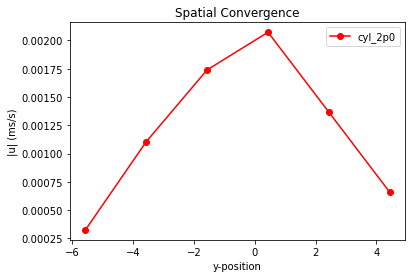

In [15]:
plt.figure()
plt.plot(output_2p0['y'], output_2p0['V_ave'], '-or', label = 'cyl_2p0')
plt.legend()
plt.title('Spatial Convergence')
plt.xlabel('y-position')
plt.ylabel('|u| (ms/s)')
plt.show()

In [16]:
ids = '00320000'
folder = 'slc_plinko_1p0'
filename_list = ['1.slice.0000007.csv']
spatial_convergence_1p0 = collections.defaultdict(list)
data = calc_spatial_conv(ids, folder, filename_list, spatial_convergence_1p0)
output_1p0 = get_the_ave(data)

6.4376


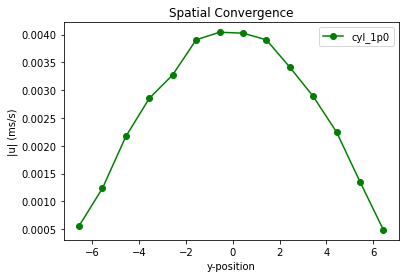

In [17]:
plt.figure()
plt.plot(output_1p0['y'], output_1p0['V_ave'], '-og', label = 'cyl_1p0')
plt.legend()
plt.title('Spatial Convergence')
plt.xlabel('y-position')
plt.ylabel('|u| (ms/s)')
plt.show()

In [22]:
ids = '01280000'
folder = 'slc_plinko_0p5'
filename_list = ['1.slice.0000115.csv', '1.slice.0000121.csv', '1.slice.0000122.csv']
spatial_convergence_0p5 = collections.defaultdict(list)
data = calc_spatial_conv(ids, folder, filename_list, spatial_convergence_0p5)
output_0p5 = get_the_ave(data)

6.9376


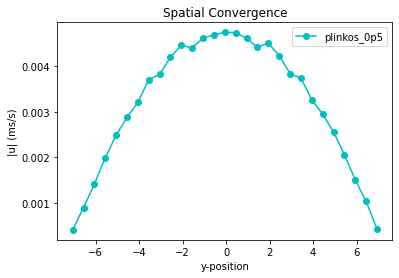

In [23]:
plt.figure()
plt.plot(output_0p5['y'], output_0p5['V_ave'], '-oc', label = 'plinkos_0p5')
plt.legend()
plt.title('Spatial Convergence')
plt.xlabel('y-position')
plt.ylabel('|u| (ms/s)')
plt.show()

In [24]:
ids = '01843200'
folder = 'slc_plinko_0p25'
filename_list = ['1.slice.0000117.csv', '1.slice.0000118.csv', '1.slice.0000124.csv', '1.slice.0000126.csv',
                 '1.slice.0000127.csv']
spatial_convergence_0p25 = collections.defaultdict(list)
data = calc_spatial_conv(ids, folder, filename_list, spatial_convergence_0p25)
output_0p25 = get_the_ave(data)

7.4376


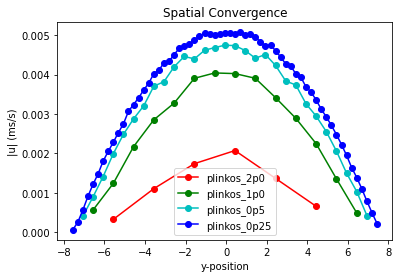

In [25]:
plt.figure()
plt.plot(output_2p0['y'], output_2p0['V_ave'], '-or', label = 'plinkos_2p0')
plt.plot(output_1p0['y'], output_1p0['V_ave'], '-og', label = 'plinkos_1p0')
plt.plot(output_0p5['y'], output_0p5['V_ave'], '-oc', label = 'plinkos_0p5')
plt.plot(output_0p25['y'], output_0p25['V_ave'], '-ob', label = 'plinkos_0p25')
plt.legend()
plt.title('Spatial Convergence')
plt.xlabel('y-position')
plt.ylabel('|u| (ms/s)')
plt.show()